
# Jae Won Park 991518989
# Artifical Intelligence 

Parkinsons Telemonitoring Data Set \
Regression \
Total_UPDRS

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data',sep=',')

dataset = dataset.drop(columns=["motor_UPDRS"])
dataset

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [54]:
dataset.shape

(5875, 21)

In [55]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5288, 21)
Unseen Data For Predictions: (587, 21)


# Setting up Environment

In [56]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS', session_id=123) 

,Description,Value
0,session_id,123
1,Target,total_UPDRS
2,Original Data,"(5288, 21)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3701, 18)"


# Comparing All Models

In [57]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2209,0.1542,0.3913,0.9987,0.0181,0.0094,0.3210
rf,Random Forest Regressor,0.2755,0.3242,0.5629,0.9972,0.0237,0.0111,0.7010
lightgbm,Light Gradient Boosting Machine,0.5907,0.8848,0.9266,0.9923,0.0398,0.0249,0.1730
dt,Decision Tree Regressor,0.2429,1.2620,1.0203,0.9891,0.0364,0.0094,0.0140
gbr,Gradient Boosting Regressor,2.0664,7.3976,2.7162,0.9357,0.1222,0.0915,0.3540
knn,K Neighbors Regressor,4.1232,35.8988,5.9862,0.6881,0.2272,0.1713,0.0090
ada,AdaBoost Regressor,5.4525,39.1458,6.2527,0.6598,0.2515,0.2382,0.1570
lr,Linear Regression,7.6294,86.8217,9.3162,0.2450,0.3490,0.3327,0.5280
br,Bayesian Ridge,7.6553,87.5214,9.3535,0.2390,0.3501,0.3338,0.0050
ridge,Ridge Regression,7.6478,87.6280,9.3591,0.2381,0.3505,0.3339,0.0050


In [58]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# AdaBoost Regressor

In [59]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1848,36.1729,6.0144,0.6814,0.2591,0.2440
1,5.0811,35.5220,5.9600,0.6755,0.2355,0.2186
2,5.4804,38.3849,6.1956,0.6640,0.2629,0.2543
3,5.7990,42.6608,6.5315,0.6334,0.2698,0.2598
4,5.5190,39.8561,6.3132,0.6799,0.2410,0.2240
5,5.2893,37.6414,6.1353,0.6700,0.2473,0.2298
6,5.5639,41.8108,6.4661,0.6349,0.2746,0.2600
7,5.7413,42.2229,6.4979,0.6304,0.2424,0.2341
8,5.6366,41.8719,6.4708,0.6508,0.2476,0.2353
9,5.2300,35.3138,5.9425,0.6778,0.2346,0.2221


In [60]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


# Light Gradient Boosting Machine

In [61]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6687,1.2555,1.1205,0.9889,0.0466,0.0284
1,0.5489,0.7122,0.8439,0.9935,0.0382,0.0234
2,0.6743,1.5343,1.2387,0.9866,0.0506,0.0295
3,0.6299,0.8578,0.9262,0.9926,0.0403,0.0271
4,0.6493,1.1205,1.0585,0.9910,0.0430,0.0259
5,0.5925,0.8230,0.9072,0.9928,0.0424,0.0255
6,0.4936,0.4701,0.6857,0.9959,0.0307,0.0213
7,0.5286,0.6504,0.8065,0.9943,0.0327,0.0209
8,0.6009,0.8564,0.9254,0.9929,0.0389,0.0244
9,0.5208,0.5674,0.7533,0.9948,0.0350,0.0224


# Decision Tree

In [62]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2195,1.3206,1.1492,0.9884,0.0461,0.0078
1,0.2338,0.8373,0.9150,0.9924,0.0304,0.0089
2,0.3506,2.1935,1.4810,0.9808,0.0585,0.0157
3,0.3183,1.7592,1.3264,0.9849,0.0386,0.0108
4,0.2472,1.1937,1.0925,0.9904,0.0543,0.0113
5,0.3889,3.4004,1.8440,0.9702,0.0567,0.0152
6,0.1246,0.1443,0.3799,0.9987,0.0136,0.0048
7,0.1323,0.1315,0.3627,0.9988,0.0120,0.0047
8,0.2624,1.4312,1.1963,0.9881,0.0371,0.0090
9,0.1509,0.2082,0.4563,0.9981,0.0172,0.0059


# Tune a model

In [63]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.6076,39.5951,6.2925,0.6513,0.2517,0.2471
1,5.2162,35.7950,5.9829,0.6730,0.2256,0.2155
2,5.6536,39.4702,6.2825,0.6545,0.2522,0.2499
3,5.6529,40.9529,6.3994,0.6481,0.2442,0.2371
4,5.3277,37.9649,6.1616,0.6950,0.2265,0.2110
5,5.7251,41.7986,6.4652,0.6336,0.2447,0.2367
6,5.7503,42.1261,6.4905,0.6321,0.2582,0.2519
7,5.7506,42.9762,6.5556,0.6238,0.2359,0.2275
8,5.5480,40.2313,6.3428,0.6645,0.2394,0.2291
9,5.6115,40.4100,6.3569,0.6313,0.2361,0.2289


In [65]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=220, random_state=123)


In [66]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [67]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4381,0.7554,0.8692,0.9933,0.0336,0.0180
1,0.4063,0.6351,0.7969,0.9942,0.0374,0.0178
2,0.4458,1.0027,1.0014,0.9912,0.0375,0.0182
3,0.4588,0.8031,0.8961,0.9931,0.0331,0.0185
4,0.5376,1.2098,1.0999,0.9903,0.0508,0.0236
5,0.4796,0.7542,0.8685,0.9934,0.0335,0.0190
6,0.3100,0.2693,0.5189,0.9976,0.0218,0.0128
7,0.3451,0.3357,0.5794,0.9971,0.0239,0.0136
8,0.3552,0.4822,0.6944,0.9960,0.0257,0.0144
9,0.3019,0.3066,0.5537,0.9972,0.0281,0.0133


In [68]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [69]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7505,2.7764,1.6663,0.9755,0.0561,0.0264
1,0.7936,2.3957,1.5478,0.9781,0.0608,0.0310
2,0.7175,2.9083,1.7054,0.9745,0.0647,0.0283
3,0.7500,2.4332,1.5599,0.9791,0.0477,0.0258
4,0.6807,1.8588,1.3634,0.9851,0.0633,0.0267
5,0.8024,4.1692,2.0419,0.9635,0.0608,0.0285
6,0.3516,0.2897,0.5382,0.9975,0.0284,0.0163
7,0.3712,0.4337,0.6586,0.9962,0.0281,0.0155
8,0.5252,1.6882,1.2993,0.9859,0.0482,0.0211
9,0.3651,0.3886,0.6233,0.9965,0.0301,0.0164


# Plot a Model

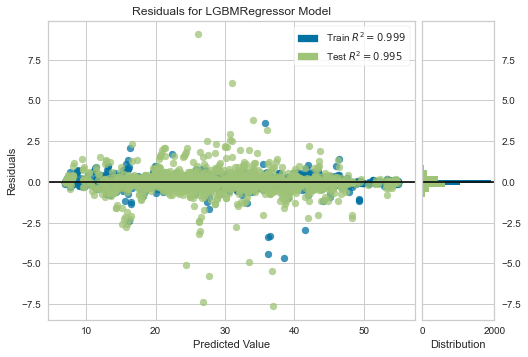

In [70]:
plot_model(tuned_lightgbm)

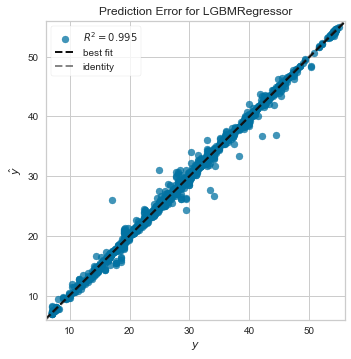

In [71]:
plot_model(tuned_lightgbm, plot = 'error')

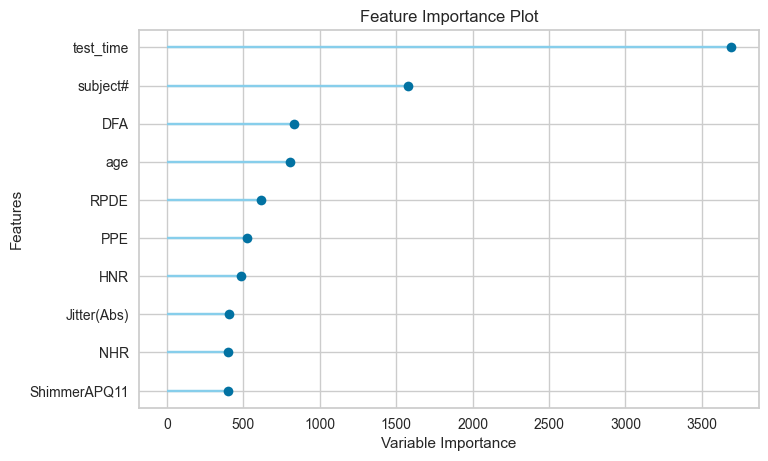

In [72]:
plot_model(tuned_lightgbm, plot='feature')

In [73]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict on Test / Hold-out Sample

In [74]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3747,0.5426,0.7366,0.9951,0.0289,0.0153


# Finalize Model for Deployment

In [75]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [76]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [77]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0953,0.0252,0.1588,0.9998,0.0069,0.0040


# Predict on Unseen Data

In [78]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,1,72,0,40.652,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,36.911799
1,1,72,0,54.640,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,37.927030
2,1,72,0,82.653,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,...,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,39.990169
3,1,72,0,96.633,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,...,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,40.242912
4,1,72,0,131.640,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,...,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,44.233333


In [79]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.999